# Florence + The Machine

Loading in the necessary libraries. 

In [2]:
import pandas as pd
import glob
import os

Loading in and concatenating each csv file (individual csv files for each album). For this artist I had to to list the columns. 

In [3]:
df_f= pd.concat(
    map(pd.read_csv, ["/Users/annacapels/Desktop/DS Projects/Florence + The Machine/csvs/Lungs (A and B Sides).csv", "/Users/annacapels/Desktop/DS Projects/Florence + The Machine/csvs/Ceremonials.csv", "/Users/annacapels/Desktop/DS Projects/Florence + The Machine/csvs/Songs From Final Fantasy XV.csv", "/Users/annacapels/Desktop/DS Projects/Florence + The Machine/csvs/How Big, How Blue, How Beautiful.csv", "/Users/annacapels/Desktop/DS Projects/Florence + The Machine/csvs/Dance Fever.csv"]), ignore_index=True)
df_f.head()

,Artist,Year,Album_Title,Track_Title,Track_Number,Lyric,Line
0,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,Happiness hit her like a train on a track,1
1,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,Coming towards her stuck still no turning back,2
2,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,She hid around corners and she hid under beds,3
3,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,"She killed it with kisses and from it, she fled",4
4,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,"With every bubble, she sank with a drink",5


Below, I group each track title and their lyrics into albums since this artist had albums that were released different years (like Hozier).

> 
- X represents a list of each different lines of lyrics for a track title
- Groupby puts everything into a list
- .join strings all lyrics into a block of lyrics
- reset_index will make it easier to select all columns as we move forward

In [4]:
songs_f = df_f.groupby("Track_Title").agg({"Lyric": lambda x: " ".join(x), "Year": "max"}).reset_index()

Next, I say how many characters can be shown in a column within the dataframe. 

In [5]:
pd.options.display.max_colwidth = 500

songs_f.head()

,Track_Title,Lyric,Year
0,Addicted To Love,"The lights are on, but you're not home Your mind is not your own Your heart sweats, your body shakes Another kiss is all it takes You can't sleep, you can't eat There's no doubt, you're in deep Your throat is tight, you can't breathe Another kiss is all you need Whoa, you would like to think that you're immune to the stuff, oh, yeah It's closer to the truth to say you can't get enough, You're gonna have to face it—you're addicted to love You see the signs, that you can't read You're running ...",2009
1,All This And Heaven Too,"And the heart is hard to translate It has a language of its own It talks in tongues and quiet sighs And prayers and proclamations In the grand deeds of great men and the smallest of gestures And short shallow gasps But with all my education I can't seem to command it And the words are all escaping, and coming back all damaged And I would put them back in poetry if I only knew how I can't seem to understand it And I would give all this and heaven too I would give it all if only for a moment T...",2011
2,Are You Hurting The One You Love?,"Are you hurting the one you love? You say you've found Heaven but you can't find God. Are you hurting the one you love? Bite your tongue till it tastes like blood. Are you hurting the one you love? So many glasses on the tabletop. Are you hurting the one you love? You'd like to stay in heaven but the rules are too tough. Tough, It's just too tough. Tough, It's just too tough. Are you hurting the one you love? When they watched the walls, and the ticking clock. Are you hurting the one you lov...",2009
3,As Far As I Could Get,In the celestial vaults I drew bedraggled breaths Because I am unloved I went as far as I could get And the cedars like spires Wasting my goddamn time Past the museum of death And the mad man yelling answers I sail on new beginnings And psychics taking chances And the cedars like spires Wasting my goddamn time As far as I could get I went as far as I could get And the cedars like spires Wasting my goddamn time Past the spires and the temple Looking like a Disney castle As far as I could get ...,2015
4,Back In Town,"Never really been alive before I always lived in my head And sometimes it was easier Hungover and half-dead I'm back in town, why don't we go out? Let the rats spin around our feet The full moon shines down on these dirty streets I'm back in town, why don't we go out To that ninth street diner? And carry on slowly, torturing each other 'Cause it's always the same I came for the pleasure, but I stayed Yes, I stayed for the pain It's lit up like a movie scene That halogen glow And if you get s...",2022


Checking how many songs of Florence + The Machine I have in total

In [6]:
len(songs_f)

80

# Start of Analyzation

## Finding themes throughout each album by using sentiment analysis

First, we download the correct packages for NLP. 

In [7]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annacapels/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stop_words.extend is edited by individually putting in words that I deemed insignificant after vecotrizing and tokenizing each word to help the words for each theme become more specific. 

In [8]:
stop_words.extend(["oh", "like", "go", "sha", "la", "well", "could", "should", "would", "say", "got", "put", "knows", "known", "cause", "try", "yet", "still", "get", "make"])

min_df here is telling that if a word is seen less than 10% of the time that those words are not considered and will be excluded from the vocabulary. 

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the file paths for the CSV files
csv_files = ["/Users/annacapels/Desktop/DS Projects/Florence + The Machine/csvs/Lungs (A and B Sides).csv", "/Users/annacapels/Desktop/DS Projects/Florence + The Machine/csvs/Ceremonials.csv", "/Users/annacapels/Desktop/DS Projects/Florence + The Machine/csvs/Songs From Final Fantasy XV.csv", "/Users/annacapels/Desktop/DS Projects/Florence + The Machine/csvs/How Big, How Blue, How Beautiful.csv", "/Users/annacapels/Desktop/DS Projects/Florence + The Machine/csvs/Dance Fever.csv"]

# Read in the CSV files as a DataFrame
df = pd.concat(map(pd.read_csv, csv_files), ignore_index=True)

# Group the lyrics by track title and year
songs = df.groupby("Track_Title").agg({"Lyric": lambda x: " ".join(x), "Year": "max"}).reset_index()

# Define the TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words = stop_words, min_df = 0.1)

# Apply text vectorization to the lyrics
tfidf = vectorizer.fit_transform(songs['Lyric'])

Here I chose to do 6 different themes/topics. 

In [10]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 6)

In [11]:
topic_values = nmf.fit_transform(tfidf)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


This bit of code below overall makes 'chooses' the individual words for each of the different topics. 

>
- for loop: loops through the different nmf components
- enumerate: lets us get individual value and index of value looping over
- message: what the individual words are in the topics AND write topic number while .format will add topic # + 1 (index starts @ zero)
- vertorizer: says for each topic grab the top 10 words for that index
>


In [12]:
for topic_num, topic in enumerate(nmf.components_):
    message = "topic #{}: ".format(topic_num + 1)
    message += " ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 :-1]])
    print(message)

topic #1: never need always back come every knew let coming
topic #2: love arms time tell sometimes see know leave face
topic #3: keep see know hold dark cannot heart away things
topic #4: us bed let water head mouth way time around
topic #5: one made said world heart day night much help
topic #6: fall enough gonna much leave let time ground body


After the first run through of the code above, I run back through to include stop_words.extend, once again to make the words in the topics more specific. 

From those topics I identified different themes. 

In [13]:
topic_labels = ['Perseverance', 'Vulnerability', 'Renewal', 'Unity', 'Commitment', 'Exhaustion']

Here I am making a new data frame and then updating it to see each song with values and it's lyrics.

In [14]:
df_topics = pd.DataFrame(topic_values, columns = topic_labels)
df_topics

,Perseverance,Vulnerability,Renewal,Unity,Commitment,Exhaustion
0,0.000089,0.364705,0.000000,0.000000,0.068367,0.133208
1,0.191207,0.000000,0.095396,0.000000,0.000000,0.000000
2,0.000000,0.368219,0.000000,0.000000,0.499445,0.000000
3,0.000000,0.035398,0.000000,0.038125,0.000000,0.306656
4,0.194897,0.000000,0.000000,0.145159,0.000000,0.000000
...,...,...,...,...,...,...
75,0.000000,0.094619,0.000000,0.473566,0.004751,0.021226
76,0.000000,0.109977,0.000000,0.472621,0.000000,0.008118
77,0.035561,0.000000,0.203592,0.027269,0.044499,0.061031
78,0.018569,0.622496,0.043839,0.000000,0.020139,0.000000


In [15]:
songs = songs.join(df_topics)
songs.head()

,Track_Title,Lyric,Year,Perseverance,Vulnerability,Renewal,Unity,Commitment,Exhaustion
0,Addicted To Love,"The lights are on, but you're not home Your mind is not your own Your heart sweats, your body shakes Another kiss is all it takes You can't sleep, you can't eat There's no doubt, you're in deep Your throat is tight, you can't breathe Another kiss is all you need Whoa, you would like to think that you're immune to the stuff, oh, yeah It's closer to the truth to say you can't get enough, You're gonna have to face it—you're addicted to love You see the signs, that you can't read You're running ...",2009,0.000089,0.364705,0.000000,0.000000,0.068367,0.133208
1,All This And Heaven Too,"And the heart is hard to translate It has a language of its own It talks in tongues and quiet sighs And prayers and proclamations In the grand deeds of great men and the smallest of gestures And short shallow gasps But with all my education I can't seem to command it And the words are all escaping, and coming back all damaged And I would put them back in poetry if I only knew how I can't seem to understand it And I would give all this and heaven too I would give it all if only for a moment T...",2011,0.191207,0.000000,0.095396,0.000000,0.000000,0.000000
2,Are You Hurting The One You Love?,"Are you hurting the one you love? You say you've found Heaven but you can't find God. Are you hurting the one you love? Bite your tongue till it tastes like blood. Are you hurting the one you love? So many glasses on the tabletop. Are you hurting the one you love? You'd like to stay in heaven but the rules are too tough. Tough, It's just too tough. Tough, It's just too tough. Are you hurting the one you love? When they watched the walls, and the ticking clock. Are you hurting the one you lov...",2009,0.000000,0.368219,0.000000,0.000000,0.499445,0.000000
3,As Far As I Could Get,In the celestial vaults I drew bedraggled breaths Because I am unloved I went as far as I could get And the cedars like spires Wasting my goddamn time Past the museum of death And the mad man yelling answers I sail on new beginnings And psychics taking chances And the cedars like spires Wasting my goddamn time As far as I could get I went as far as I could get And the cedars like spires Wasting my goddamn time Past the spires and the temple Looking like a Disney castle As far as I could get ...,2015,0.000000,0.035398,0.000000,0.038125,0.000000,0.306656
4,Back In Town,"Never really been alive before I always lived in my head And sometimes it was easier Hungover and half-dead I'm back in town, why don't we go out? Let the rats spin around our feet The full moon shines down on these dirty streets I'm back in town, why don't we go out To that ninth street diner? And carry on slowly, torturing each other 'Cause it's always the same I came for the pleasure, but I stayed Yes, I stayed for the pain It's lit up like a movie scene That halogen glow And if you get s...",2022,0.194897,0.000000,0.000000,0.145159,0.000000,0.000000


Next, I will set a threshold. This means that if a tokenization is higher than 10% it will show as a score of 1 and if lower than 10% it will show as 0. 

In [16]:
songs.loc[songs['Perseverance'] >= 0.1, 'Perseverance'] = 1
songs.loc[songs['Vulnerability'] >= 0.1, 'Vulnerability'] = 1
songs.loc[songs['Renewal'] >= 0.1, 'Renewal'] = 1
songs.loc[songs['Unity'] >= 0.1, 'Unity'] = 1
songs.loc[songs['Commitment'] >= 0.1, 'Commitment'] = 1
songs.loc[songs['Exhaustion'] >= 0.1, 'Exhaustion'] = 1

In [17]:
songs.loc[songs['Perseverance'] <= 0.1, 'Perseverance'] = 0
songs.loc[songs['Vulnerability'] <= 0.1, 'Vulnerability'] = 0
songs.loc[songs['Renewal'] <= 0.1, 'Renewal'] = 0
songs.loc[songs['Unity'] <= 0.1, 'Unity'] = 0
songs.loc[songs['Commitment'] <= 0.1, 'Commitment'] = 0
songs.loc[songs['Exhaustion'] <= 0.1, 'Exhaustion'] = 0
#if scores below 0.1 threshold make score 1 

Checking that it worked...

In [18]:
songs.head()

,Track_Title,Lyric,Year,Perseverance,Vulnerability,Renewal,Unity,Commitment,Exhaustion
0,Addicted To Love,"The lights are on, but you're not home Your mind is not your own Your heart sweats, your body shakes Another kiss is all it takes You can't sleep, you can't eat There's no doubt, you're in deep Your throat is tight, you can't breathe Another kiss is all you need Whoa, you would like to think that you're immune to the stuff, oh, yeah It's closer to the truth to say you can't get enough, You're gonna have to face it—you're addicted to love You see the signs, that you can't read You're running ...",2009,0.0,1.0,0.0,0.0,0.0,1.0
1,All This And Heaven Too,"And the heart is hard to translate It has a language of its own It talks in tongues and quiet sighs And prayers and proclamations In the grand deeds of great men and the smallest of gestures And short shallow gasps But with all my education I can't seem to command it And the words are all escaping, and coming back all damaged And I would put them back in poetry if I only knew how I can't seem to understand it And I would give all this and heaven too I would give it all if only for a moment T...",2011,1.0,0.0,0.0,0.0,0.0,0.0
2,Are You Hurting The One You Love?,"Are you hurting the one you love? You say you've found Heaven but you can't find God. Are you hurting the one you love? Bite your tongue till it tastes like blood. Are you hurting the one you love? So many glasses on the tabletop. Are you hurting the one you love? You'd like to stay in heaven but the rules are too tough. Tough, It's just too tough. Tough, It's just too tough. Are you hurting the one you love? When they watched the walls, and the ticking clock. Are you hurting the one you lov...",2009,0.0,1.0,0.0,0.0,1.0,0.0
3,As Far As I Could Get,In the celestial vaults I drew bedraggled breaths Because I am unloved I went as far as I could get And the cedars like spires Wasting my goddamn time Past the museum of death And the mad man yelling answers I sail on new beginnings And psychics taking chances And the cedars like spires Wasting my goddamn time As far as I could get I went as far as I could get And the cedars like spires Wasting my goddamn time Past the spires and the temple Looking like a Disney castle As far as I could get ...,2015,0.0,0.0,0.0,0.0,0.0,1.0
4,Back In Town,"Never really been alive before I always lived in my head And sometimes it was easier Hungover and half-dead I'm back in town, why don't we go out? Let the rats spin around our feet The full moon shines down on these dirty streets I'm back in town, why don't we go out To that ninth street diner? And carry on slowly, torturing each other 'Cause it's always the same I came for the pleasure, but I stayed Yes, I stayed for the pain It's lit up like a movie scene That halogen glow And if you get s...",2022,1.0,0.0,0.0,1.0,0.0,0.0


Going into the songs dataframe and grouping everything by year, then sum will figure out how often a topic appears in a song for each year. 

In [19]:
year_topics = songs.groupby("Year").sum().reset_index()

In [20]:
year_topics.head()

,Year,Track_Title,Lyric,Perseverance,Vulnerability,Renewal,Unity,Commitment,Exhaustion
0,2009,Addicted To LoveAre You Hurting The One You Love?Between Two LungsBird SongBlindingCosmic LoveDog Days Are OverDog Days Are Over (Yeasayer Remix)Drumming SongFallingGhosts (Demo)Girl With One EyeHardest Of HeartsHeavy In Your ArmsHospital Beds HowlHurricane DrunkI'm Not Calling You A LiarKiss With A FistMy Boy Build CoffinsRabbit Heart (Raise It Up)SwimmingYou've Got The Dirtee Love (with Dizzee Rascal)You've Got The Love,"The lights are on, but you're not home Your mind is not your own Your heart sweats, your body shakes Another kiss is all it takes You can't sleep, you can't eat There's no doubt, you're in deep Your throat is tight, you can't breathe Another kiss is all you need Whoa, you would like to think that you're immune to the stuff, oh, yeah It's closer to the truth to say you can't get enough, You're gonna have to face it—you're addicted to love You see the signs, that you can't read You're running ...",1.0,9.0,8.0,6.0,5.0,6.0
1,2011,"All This And Heaven TooBedroom HymnsBreaking DownHeartlinesLandscape DemoLeave My Body Lover To LoverNever Let Me GoNo Light, No LightOnly If For A NightRemain NamelessSeven DevilsShake It OutSpectrumStrangeness And CharmWhat The Water Gave MeWhat The Water Gave Me Demo","And the heart is hard to translate It has a language of its own It talks in tongues and quiet sighs And prayers and proclamations In the grand deeds of great men and the smallest of gestures And short shallow gasps But with all my education I can't seem to command it And the words are all escaping, and coming back all damaged And I would put them back in poetry if I only knew how I can't seem to understand it And I would give all this and heaven too I would give it all if only for a moment T...",5.0,3.0,6.0,5.0,1.0,2.0
2,2015,"As Far As I Could GetCaughtConductor DelilahHidingHow Big, How Blue, How Beautiful Long And LostMake Up Your MindMotherPure FeelingQueen Of PeaceShip To WreckSt. JudeThird EyeVarious Storms And SaintsWhat Kind Of ManWitch Wich",In the celestial vaults I drew bedraggled breaths Because I am unloved I went as far as I could get And the cedars like spires Wasting my goddamn time Past the museum of death And the mad man yelling answers I sail on new beginnings And psychics taking chances And the cedars like spires Wasting my goddamn time As far as I could get I went as far as I could get And the cedars like spires Wasting my goddamn time Past the spires and the temple Looking like a Disney castle As far as I could get ...,5.0,4.0,9.0,4.0,1.0,5.0
3,2016,I Will BeStand By MeToo Much Is Never Enough,"I will be... Silence will not cover me... I will be... And silence will not cover me...When the night has come And the land is dark And the moon is the only light we see No, I won't be afraid Oh, I won't be afraid Just as long as you stand, stand by me So, darling, darling, stand by me Oh, stand by me Oh, stand now, stand by me, stand by me If the sky that we look upon Should tumble and fall Or the mountain should crumble to the sea I won't cry, I won't cry No, I won't shed a tear Just as lo...",0.0,0.0,1.0,0.0,1.0,2.0
4,2022,Back In TownCassandra (Poem Version)CassnadraChoreomaniaDaffodilDream Girl EvilFreeGirls Against GodHeaven Is HereKingKing (Poem Version)MermaidsMorning Elvis My LoveMy Love (Poem Version)Prayer FactoryRestraintSearch And Destroy (orignally by The Stooges)The Bomb,"Never really been alive before I always lived in my head And sometimes it was easier Hungover and half-dead I'm back in town, why don't we go out? Let the rats spin around our feet The full moon shines down on these dirty streets I'm back in town, why don't we go out To that ninth street diner? And carry on slowly, torturing each other 'Cause it's always the same I came for the pleasure, but I stayed Yes, I stayed for the pain It's lit up like a movie scene That halogen glow And if you get s...",7.0,5.0,6.0,4.0,5.0,2.0


Importing libraries to visualize findings.

In [21]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'X')

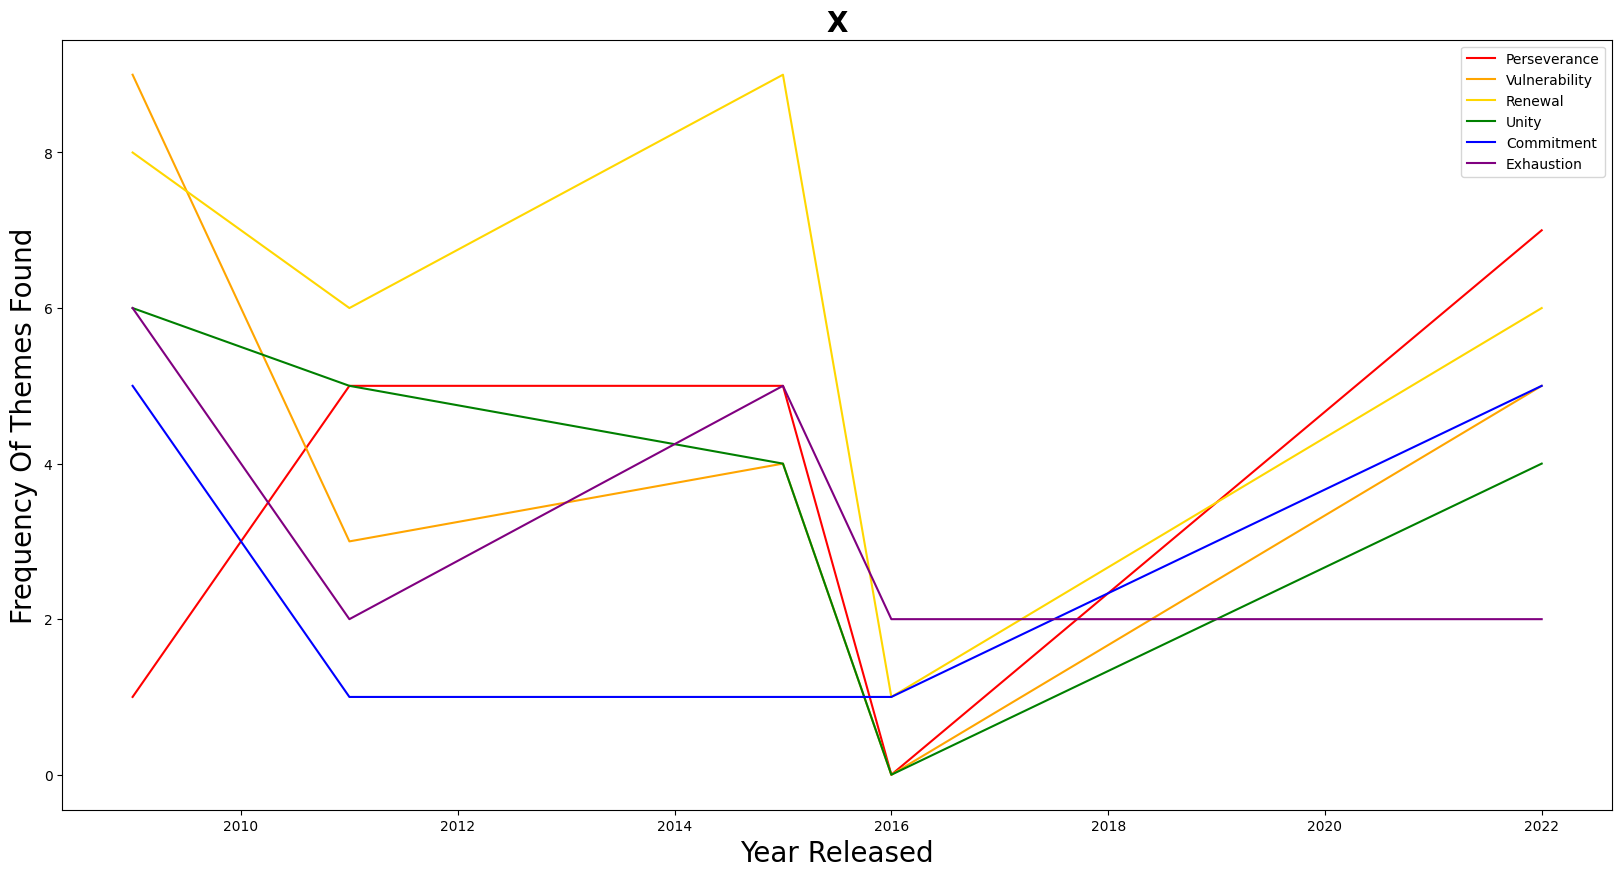

In [22]:
plt.figure(figsize = (20,10))
plt.plot(year_topics["Year"], year_topics['Perseverance'], label = topic_labels[0], c='red')
plt.plot(year_topics["Year"], year_topics['Vulnerability'], label = topic_labels[1], c='orange')
plt.plot(year_topics["Year"], year_topics['Renewal'], label = topic_labels[2], c='gold')
plt.plot(year_topics["Year"], year_topics['Unity'], label = topic_labels[3], c='green')
plt.plot(year_topics["Year"], year_topics['Commitment'], label = topic_labels[4], c='blue')
plt.plot(year_topics["Year"], year_topics['Exhaustion'], label = topic_labels[5], c='purple')
plt.legend()

#label to help keep track of each individual plots

#setting axis, title, + font
font1 = {'family':'sans', 'color': 'black', 'size':20}
plt.xlabel("Year Released", loc='center', fontdict=font1)
plt.ylabel("Frequency Of Themes Found", loc='center', fontdict=font1)
plt.title("X", loc='center', fontdict=font1, fontweight='bold')


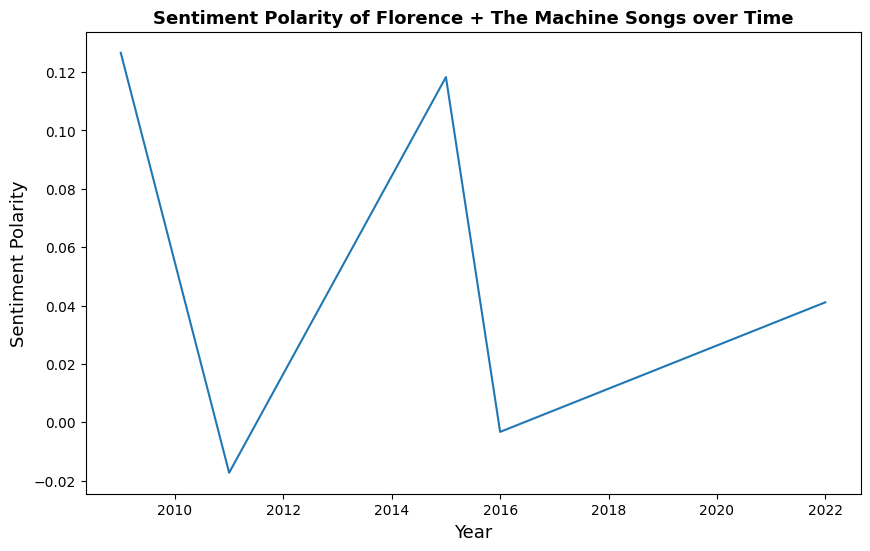

In [23]:
from textblob import TextBlob

# Define a function to get the sentiment polarity score for each set of lyrics
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the lyrics column of the songs DataFrame
songs['Sentiment_Polarity'] = songs['Lyric'].apply(get_sentiment_polarity)

# Group the songs by year and calculate the mean sentiment polarity for each year
year_sentiment = songs.groupby('Year')['Sentiment_Polarity'].mean().reset_index()

# Plot the sentiment polarity over time
font1 = {'family':'sans', 'color': 'black', 'size':13}
plt.figure(figsize=(10, 6))
plt.plot(year_sentiment['Year'], year_sentiment['Sentiment_Polarity'])
plt.xlabel('Year', loc='center', fontdict=font1)
plt.ylabel('Sentiment Polarity', loc='center', fontdict=font1)
plt.title('Sentiment Polarity of Florence + The Machine Songs over Time', loc='center', fontdict=font1, fontweight = 'bold')
plt.show()


## Lyric Generator

In [24]:
from collections.abc import Mapping
import markovify
import language_tool_python

#Combining all lyrics into a single string
lyrics = ' '.join(songs['Lyric'])

#Making a Markov model of the lyrics
model = markovify.Text(lyrics, state_size=2)

#Generating and correcting new sentences
tool = language_tool_python.LanguageTool('en-US')
for i in range(2):
    #Making a new sentence
    sentence = model.make_sentence()

    if sentence is not None:
        #Fixing grammar errors in the sentence
        corrected_sentence = tool.correct(sentence)

        #Printing the original and corrected sentences
        print('Original sentence:', sentence)
        print('Corrected sentence:', corrected_sentence)
    else:
        print('Error: Unable to generate a sentence.')

#Run time: 8 seconds

Original sentence: I know it'll have to be alive Crying into cereal at midnight If they ever let me know?
Corrected sentence: I know it'll have to be alive Crying into cereal at midnight If they ever let me know?
Original sentence: Oh, come and get me Drag me out, destroy me I've been deafened to And all my bones began to shake, my eyes flew open And all the walls of dreaming, they were torn wide open And oh, how much!
Corrected sentence: Oh, come and get me Drag me out, destroy me I've been deafened to And all my bones began to shake, my eyes flew open And all the walls of dreaming, they were torn wide open And oh, how much!


Note: We see an Error as there is likely not enough data (lyrics) for the tool to create another additional sentence. 

## Sentiment Analysis

Importing necessary libraries

In [25]:
import nltk
import numpy as np
from nltk import sentiment
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/annacapels/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Below, I put the boundaries to define the category negative as anything lower than a sentiment rating of -0.35. Positive is anything above 0.35 and neutral are any scores between -0.35 and 0.35. 

In [26]:
senti_analyze = sentiment.vader.SentimentIntensityAnalyzer()

df['sentiment_rating'] = pd.DataFrame(df.Lyric.apply(senti_analyze.polarity_scores).tolist())['compound']
df['sentiment'] = pd.cut(df['sentiment_rating'], [-np.inf, -0.35, 0.35, np.inf], labels=['negative', 'neutral', 'positive'])

df.head()

,Artist,Year,Album_Title,Track_Title,Track_Number,Lyric,Line,sentiment_rating,sentiment
0,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,Happiness hit her like a train on a track,1,0.7269,positive
1,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,Coming towards her stuck still no turning back,2,-0.4939,negative
2,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,She hid around corners and she hid under beds,3,-0.2023,neutral
3,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,"She killed it with kisses and from it, she fled",4,-0.2960,neutral
4,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,"With every bubble, she sank with a drink",5,0.0000,neutral


## Lyrical Density 

Importing libraries. 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Saving df with the lyrics to a csv 
trial_df = df 
trial_df.to_csv('Lyrics-HOZIER.csv')

In [29]:
df.head()

,Artist,Year,Album_Title,Track_Title,Track_Number,Lyric,Line,sentiment_rating,sentiment
0,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,Happiness hit her like a train on a track,1,0.7269,positive
1,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,Coming towards her stuck still no turning back,2,-0.4939,negative
2,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,She hid around corners and she hid under beds,3,-0.2023,neutral
3,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,"She killed it with kisses and from it, she fled",4,-0.2960,neutral
4,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,"With every bubble, she sank with a drink",5,0.0000,neutral


In [30]:
df['characters'] = df.Lyric.str.len()
df['words'] = df.Lyric.str.split().str.len()
df['lines'] = df.Lyric.str.split('\n').str.len()
df['uniq_words'] = df.Lyric.apply(lambda x: len(set(x.split())))
df['lexical_density'] = df['uniq_words'] / df['words']

df.head()

,Artist,Year,Album_Title,Track_Title,Track_Number,Lyric,Line,sentiment_rating,sentiment,characters,words,lines,uniq_words,lexical_density
0,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,Happiness hit her like a train on a track,1,0.7269,positive,41,9,1,8,0.888889
1,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,Coming towards her stuck still no turning back,2,-0.4939,negative,46,8,1,8,1.000000
2,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,She hid around corners and she hid under beds,3,-0.2023,neutral,45,9,1,8,0.888889
3,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,"She killed it with kisses and from it, she fled",4,-0.2960,neutral,47,10,1,10,1.000000
4,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,"With every bubble, she sank with a drink",5,0.0000,neutral,40,8,1,8,1.000000


In [31]:
#Renaming Columns so have Capatalized + 'Units'

df = df.rename(columns={
    'Lyric': 'Lyrics',
    'sentiment': 'Sentiment Category',
    'sentiment_rating': 'Sentiment Rating',
    'characters': 'Characters',
    'words': 'Number of Words',
    'lines': 'Number of Lines',
    'uniq_words': 'Number of Unique Words',
    'lexical_density': 'Lexical Density'
})

In [32]:
df.head()

,Artist,Year,Album_Title,Track_Title,Track_Number,Lyrics,Line,Sentiment Rating,Sentiment Category,Characters,Number of Words,Number of Lines,Number of Unique Words,Lexical Density
0,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,Happiness hit her like a train on a track,1,0.7269,positive,41,9,1,8,0.888889
1,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,Coming towards her stuck still no turning back,2,-0.4939,negative,46,8,1,8,1.000000
2,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,She hid around corners and she hid under beds,3,-0.2023,neutral,45,9,1,8,0.888889
3,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,"She killed it with kisses and from it, she fled",4,-0.2960,neutral,47,10,1,10,1.000000
4,Florence And The Machine,2009,Lungs,Dog Days Are Over,1,"With every bubble, she sank with a drink",5,0.0000,neutral,40,8,1,8,1.000000


Then I sum columns words and number of unique words, and divide total_uniq with total_words to get a total lyrical density. 
Lyrical density simplified is essentially the larger the density score the more lyrical or poetical the songs may seem. On the other hand, a smaller density score may mean that the songs are more straightforward and get directly to the point. 

In [33]:
df['Number of Words'].sum()

22221

In [34]:
def total_density():
    total_words = df['Number of Words'].sum()
    print('The total amount of words is',(total_words))
    total_uniq = df['Number of Unique Words'].sum()
    print('The total amount of unique words is',(total_uniq))
    return total_uniq / total_words

print('The total density is', (total_density()))

The total amount of words is 22221
The total amount of unique words is 21258
The total density is 0.9566626164439044


## Graphs comparing Sentiment, Lexical Desnity, and Unique Words. 

## Sentiment Category vs Lexical Density

/var/folders/1b/p1vnpxpx7v1b42147dnjlxb40000gn/T/ipykernel_880/1859551052.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, order=['negative', 'neutral', 'positive'], jitter=0.2, size=2.5, palette=custom_palette)


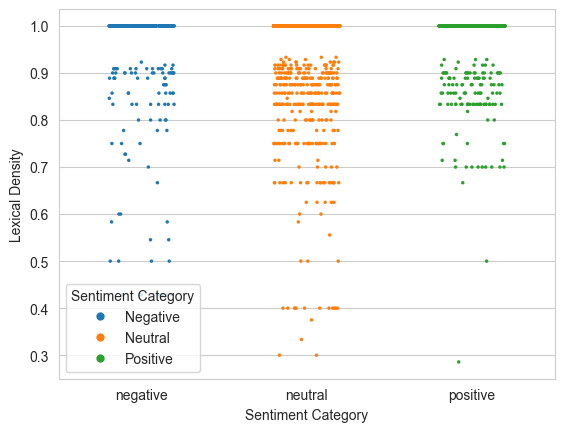

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

#Defining a custom color palette with three colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

#Stripping plot with custom colors and legend
sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, order=['negative', 'neutral', 'positive'], jitter=0.2, size=2.5, palette=custom_palette)

#Creating a custom legend with three colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor=custom_palette[0], markersize=7),
                   plt.Line2D([0], [0], marker='o', color='w', label='Neutral', markerfacecolor=custom_palette[1], markersize=7),
                   plt.Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor=custom_palette[2], markersize=7)]
plt.legend(title='Sentiment Category', loc='lower left', handles=legend_elements)

#Adding labels for the x and y axes
plt.xlabel('Sentiment Category')
plt.ylabel('Lexical Density')

#Showing the plot
plt.show()

This is another way of looking at the data, but I find this more difficult than the one above. 

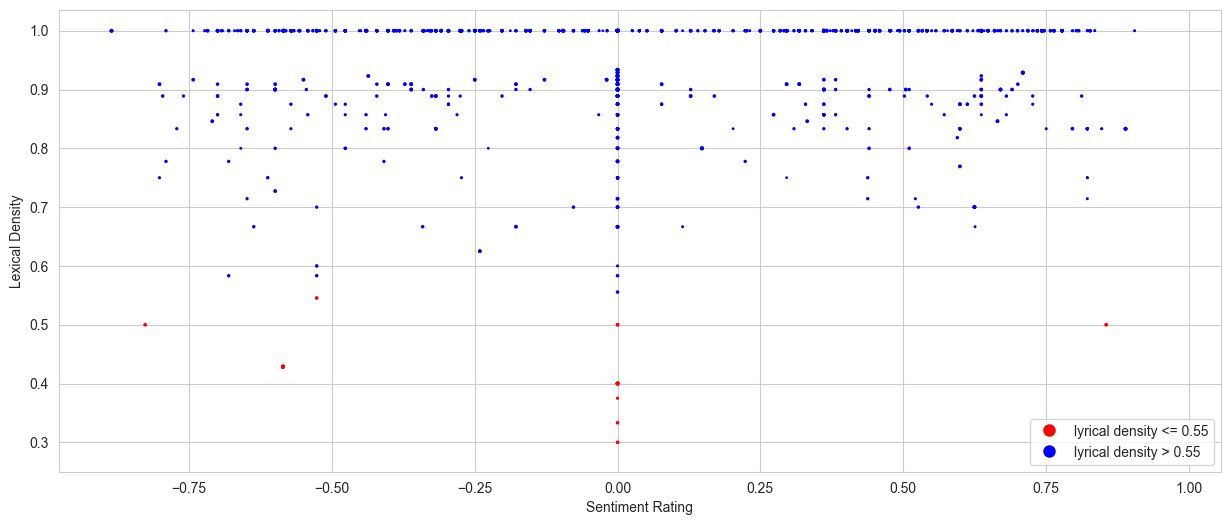

In [36]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#Defining custom colors for the legend
colors = {'red': 'lyrical density <= 0.55', 'blue': 'lyrical density > 0.55'}

#Creating custom legend elements using Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=colors['red'], markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label=colors['blue'], markerfacecolor='blue', markersize=10)]

#Creating the scatter plot
df.plot.scatter(x='Sentiment Rating', y='Lexical Density', s=df['Characters']/20,
                c=np.where(df['Lexical Density'].le(0.55), "red", "blue"),
                figsize=(15, 6))

#Adding the custom legend to the plot
plt.legend(handles=legend_elements, loc='lower right')

#Showing the plot
plt.show()

#red=if lyrical density less than or equal to .55
#blue=data if lyrical density greater than .55
#The size of each dot is determined by the corresponding value in the characters column divided by 20.

To see if there is any linear relationship beween the variables I will find the correlation coefficient (also commonly known as the 'R Value') which measures the strength and direction of a linear relationship between two variables. 

Finding the R Value

In [37]:
import pandas as pd

#Calculating the correlation coefficient between Sentiment Rating and Lexical Density
corr_coeff = df['Sentiment Rating'].corr(df['Lexical Density'])

#Printing the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

Correlation Coefficient: 0.034284658259059984


## Analysis of Sentiment Category vs Lexcial Density

There seems to be no statistically significant linear relationship between the variables of sentiment category and lexical density. 

## Sentiment Category vs Number of Unique Words

/var/folders/1b/p1vnpxpx7v1b42147dnjlxb40000gn/T/ipykernel_880/3361886664.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Sentiment Category', y='Number of Unique Words', data=df, order=['negative', 'neutral', 'positive'], jitter=0.3, size=3, palette=custom_palette)


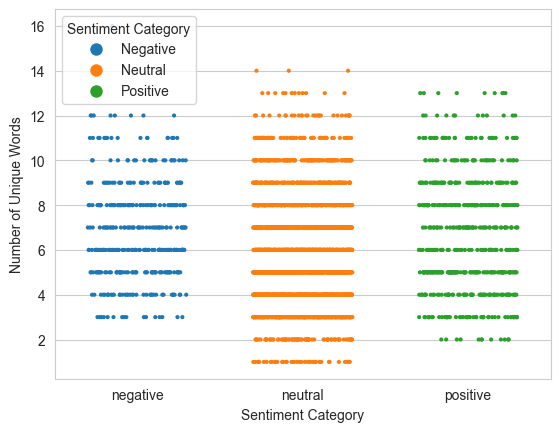

In [38]:
###WORKING...COMPARING:
#NUMBER OF UNIQUE WORDS VS SENTIMENT CATEGORY#

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

#Defining a custom color palette with three colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

#Stripping plot with custom colors and legend
sns.stripplot(x='Sentiment Category', y='Number of Unique Words', data=df, order=['negative', 'neutral', 'positive'], jitter=0.3, size=3, palette=custom_palette)

#Creating a custom legend with three colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor=custom_palette[0], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Neutral', markerfacecolor=custom_palette[1], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor=custom_palette[2], markersize=10)]
plt.legend(title='Sentiment Category', loc='upper left', handles=legend_elements)

#Adding labels for the x and y axes
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Unique Words')

#Showing 
plt.show()

## Analysis of Sentiment Category vs Number of Unique Words

Finding the R Value. 

In [39]:
#NUMBER OF UNIQUE WORDS + SENTIMENT CATEGORY#

import pandas as pd

#Grouping the data by Sentiment Category and calculate the mean Number of Unique Words for each group
grouped_df = df.groupby('Sentiment Category')['Number of Unique Words'].mean()

#Calculating the correlation coefficient (r value) between Number of Unique Words and Sentiment Category
corr_coeff = grouped_df.corr(pd.Series([0, 1, 2]))

#Printing the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

Correlation Coefficient: nan


Since we got a null value for an R value, I decided to use  Kendall's rank correlation coefficient (also commonly known as Kendall's tau) is a measure of rank correlation between two variables; meaning it assess similarity of the orders of data points rather than the specific values of the variables themselves. I did this as I doubted that the number of unique words and sentiment category would be a linear relationship. 

In [40]:
#NUMBER OF UNIQUE WORDS + SENTIMENT CATEGORY

from scipy.stats import kendalltau

#Calculating the Kendall rank correlation coefficient between Lexical Density and Sentiment Category
kendall_coeff, kendall_pvalue = kendalltau(df['Number of Unique Words'], df['Sentiment Category'])

#Printing the correlation coefficient
print("Kendall Rank Correlation Coefficient:", kendall_coeff)

Kendall Rank Correlation Coefficient: 0.005613828323270275


From Kendall's tau we see that there is essentially no monotonic relationship between the variables sentiment category and number of unique words, as the number is so close to 0. 

## Sentiment Category vs Lexical Desnity vs Unique Words 

/var/folders/1b/p1vnpxpx7v1b42147dnjlxb40000gn/T/ipykernel_880/2385908331.py:14: UserWarning: 
The palette list has fewer values (3) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, hue='Number of Unique Words', order=['negative', 'neutral', 'positive'], jitter=0.25, size=2, palette=custom_palette)


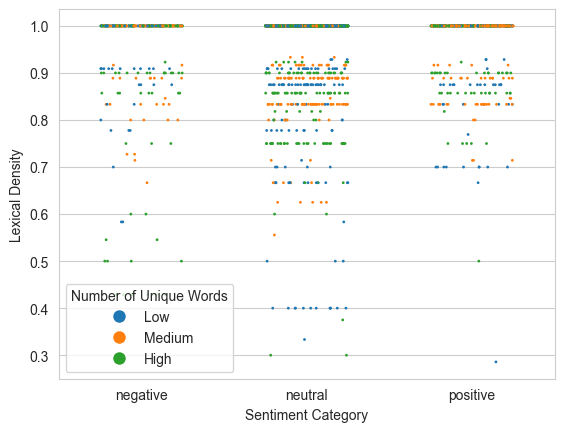

In [41]:
##THIS IS IT BUT IDK IT SUCKS ASS TO READ TBH###
###WORKING...COMPARING:
#LEXICAL DENSITY VS SENTIMENT CATEGORY vs NUMBER OF UNIQUE WORDS (dot color)#

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

#Defining a custom color palette with three colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

#Stripping plot with custom legend
sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, hue='Number of Unique Words', order=['negative', 'neutral', 'positive'], jitter=0.25, size=2, palette=custom_palette)

#Creating a custom legend with three dots
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Low', markerfacecolor=custom_palette[0], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Medium', markerfacecolor=custom_palette[1], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='High', markerfacecolor=custom_palette[2], markersize=10)]
plt.legend(title='Number of Unique Words', loc='lower left', handles=legend_elements)

#Showing the plot
plt.show()

Finding the R Values. 

Already found for:
Number of Unique Words vs Sentiment Category 
> 
- R Value: N/A
- Kendall Rank Correlation Coefficient: 0.01
>

Sentiment Category vs Lexical Density
>
- R Value: 0.03
- Kendall Rank Correlation Coefficient: Did not execute because an R Value was found. 
>

As we can see so far there have been no significant linear relationships between any variables yet. Additionally, the only relationship we haven't found yet is between Lexical Density and the Number of Unique Words. Again, we will check for an R value first, and if there is none present we will move onto doing a Kendall Rank Correlation. 

In [42]:
#LEXICAL DENSITY + NUMBER OF UNIQUE WORDS#

import pandas as pd

#Calculating the correlation coefficient between Lexical Density and Number of Unique Words
corr_coeff = df['Lexical Density'].corr(df['Number of Unique Words'])

#Printing the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

Correlation Coefficient: -0.04856508423146607


## Type-Token  (TTR)

TTR is a metric used to measure the lexical diversity or richness of a text as it calculates the ratio of unique words (types) to the total number of words (tokens). 
>
[forumla: TTR = (Number of Unique Words) / (Total Number of Words)]
>
Higher TTR indicates greater diversity of vocabulary while a lower TTR suggests a more repetitive vocabulary. 

Importing libraries. 

In [43]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [44]:
text = trial_df.to_csv(sep=' ', index=False, header=False)


tokenized = word_tokenize(text)
len(tokenized)
len(set(tokenized))

2747

In [45]:
def lexical_richness(text):
    return len(set(text)) / len(text)

#Getting the percentage
lexical_richness(tokenized)

0.02314218077354024

## Sentiment Analysis of Albums and Songs

Stripping whitespace from column titles before continuing

In [46]:
df.columns = df.columns.str.strip()

### Sentiment Rating for Each Album or EP

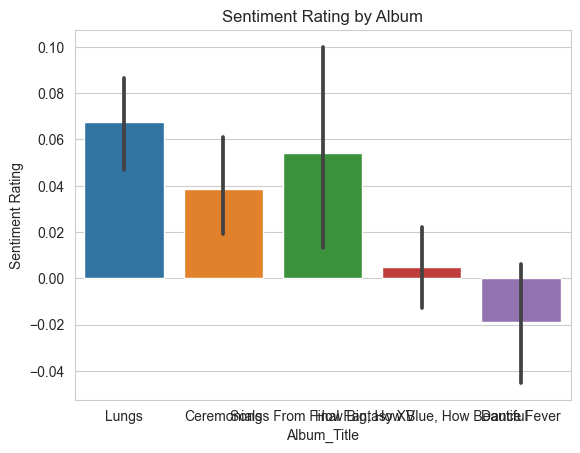

In [47]:
import seaborn as sns

#Creating a palette of pastel colors
palette = sns.color_palette('pastel')

#Making a bar plot of sentiment rating by album with pastel-colored bars
sns.barplot(x='Album_Title', y='Sentiment Rating', data=df) #palette=palette)

#Setting title and labels
plt.title('Sentiment Rating by Album')
plt.xlabel('Album_Title')
plt.ylabel('Sentiment Rating')
plt.show()


## Sentiment Ratings for Each Track for Each Album

### Lungs

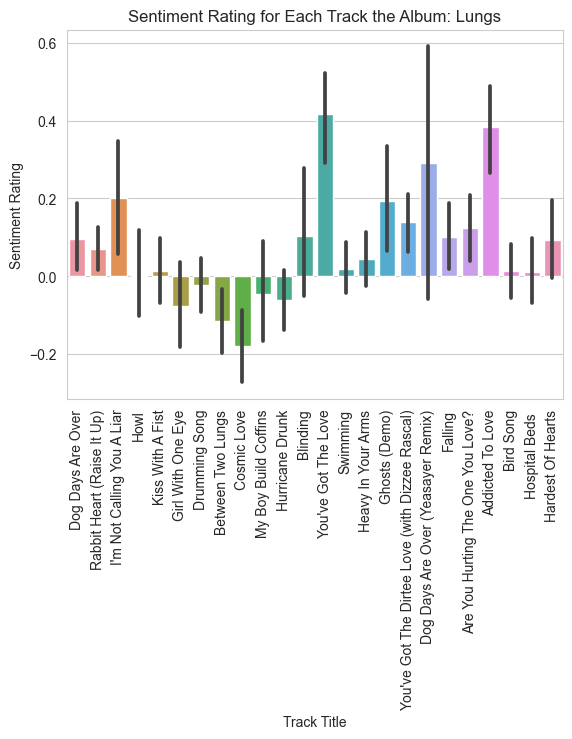

In [48]:
import seaborn as sns

#Creating a bar plot of sentiment rating by song title for one album
sns.barplot(x='Track_Title', y='Sentiment Rating', data=df[df['Album_Title'] == 'Lungs'])

#Setting the plot title and labels
plt.title('Sentiment Rating for Each Track the Album: Lungs')
plt.xlabel('Track Title')
plt.ylabel('Sentiment Rating')
plt.xticks(rotation=90)
plt.show()

### Ceremonials

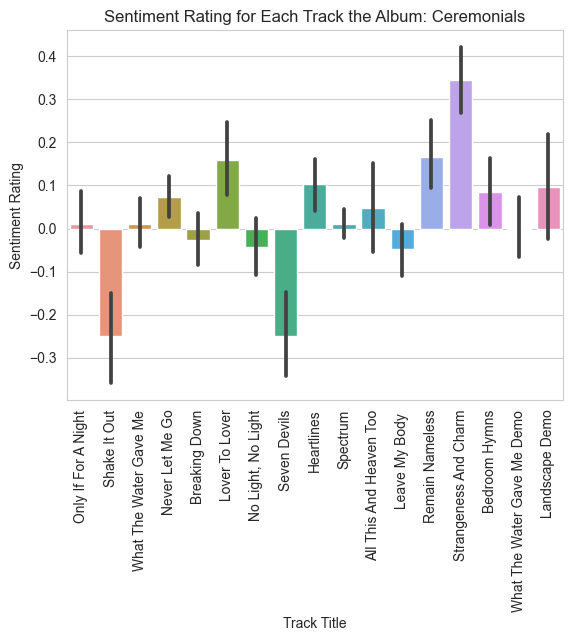

In [49]:
#Creating a bar plot of sentiment rating by song title for one album
sns.barplot(x='Track_Title', y='Sentiment Rating', data=df[df['Album_Title'] == 'Ceremonials'])

#Setting the plot title and labels
plt.title('Sentiment Rating for Each Track the Album: Ceremonials')
plt.xlabel('Track Title')
plt.ylabel('Sentiment Rating')
plt.xticks(rotation=90)
plt.show()

### Songs from Final Fantasy XV

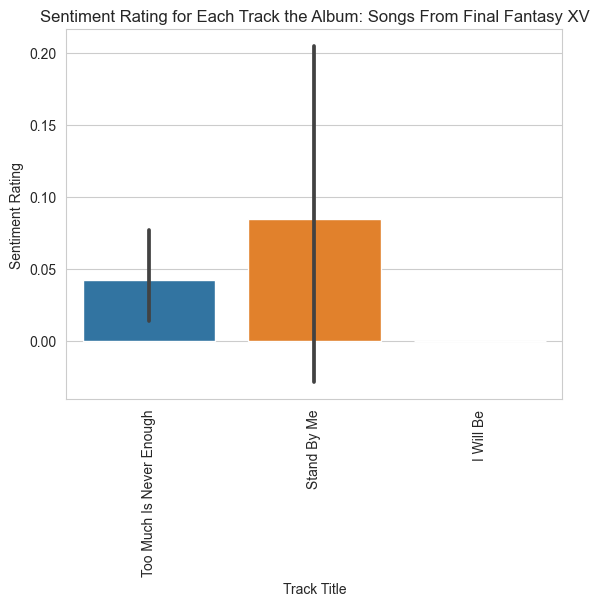

In [50]:
#Creating a bar plot of sentiment rating by song title for one album
sns.barplot(x='Track_Title', y='Sentiment Rating', data=df[df['Album_Title'] == 'Songs From Final Fantasy XV'])

#Setting the plot title and labels
plt.title('Sentiment Rating for Each Track the Album: Songs From Final Fantasy XV')
plt.xlabel('Track Title')
plt.ylabel('Sentiment Rating')
plt.xticks(rotation=90)
plt.show()

### How Big, How Blue, How Beautiful

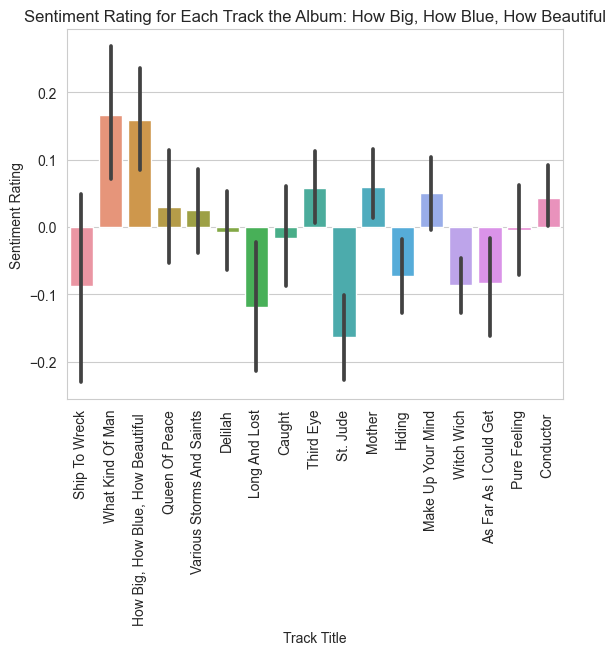

In [51]:
import seaborn as sns

#Creating a bar plot of sentiment rating by song title for one album
sns.barplot(x='Track_Title', y='Sentiment Rating', data=df[df['Album_Title'] == 'How Big, How Blue, How Beautiful'])

#Setting the plot title and labels
plt.title('Sentiment Rating for Each Track the Album: How Big, How Blue, How Beautiful')
plt.xlabel('Track Title')
plt.ylabel('Sentiment Rating')
plt.xticks(rotation=90)
plt.show()

### Dance Fever

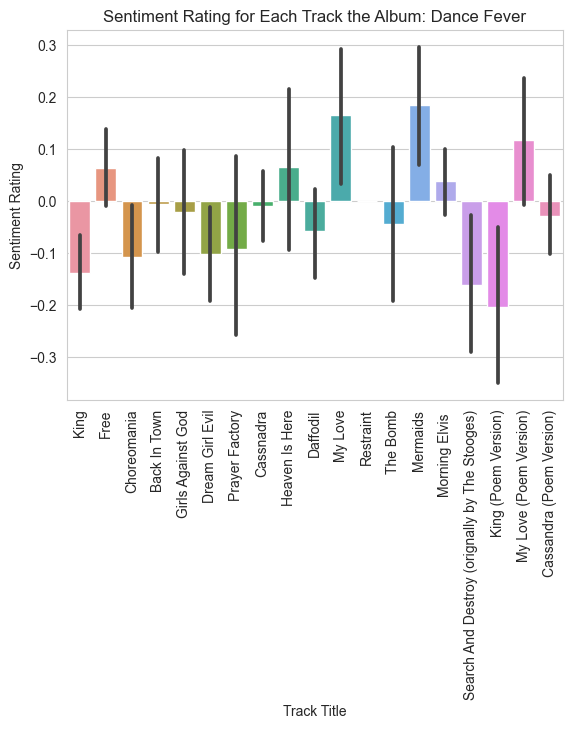

In [52]:
#Creating a bar plot of sentiment rating by song title for one album
sns.barplot(x='Track_Title', y='Sentiment Rating', data=df[df['Album_Title'] == 'Dance Fever'])

#Setting the plot title and labels
plt.title('Sentiment Rating for Each Track the Album: Dance Fever')
plt.xlabel('Track Title')
plt.ylabel('Sentiment Rating')
plt.xticks(rotation=90)
plt.show()

### All Songs and Their Sentiment Ratings

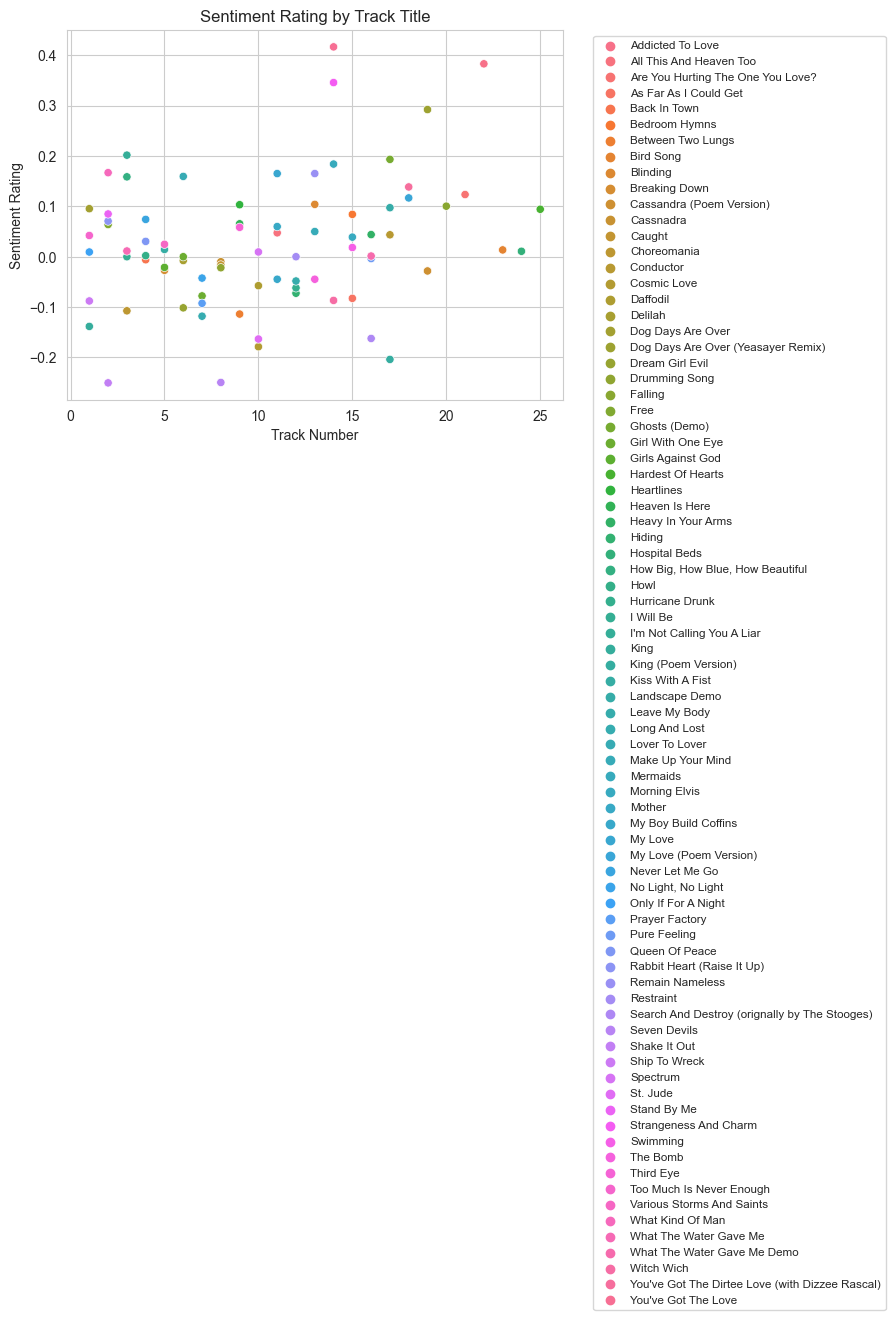

In [53]:
#Grouping the data by track title and track number and compute the average sentiment rating for each track
grouped = df.groupby(['Track_Title', 'Track_Number'])['Sentiment Rating'].mean().reset_index()

#Creating a scatter plot of sentiment rating by track number for each track title
sns.scatterplot(x='Track_Number', y='Sentiment Rating', hue='Track_Title', data=grouped)

#Setting the plot title and labels
plt.title('Sentiment Rating by Track Title')
plt.xlabel('Track Number')
plt.ylabel('Sentiment Rating')

#Seting the font size and location of the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.show()

## Common Words

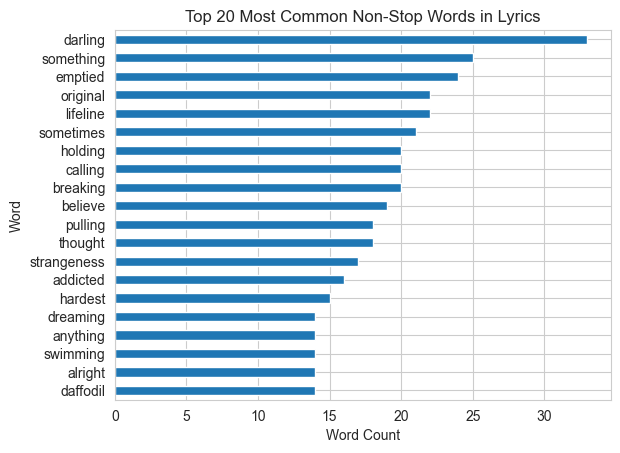

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

#Extending stopwords...from above 
stop_words.extend(["oh", "like","should", "would", "could", "through", "let", "babe", "lover", "tell", "wouldn't", "couldn't", "shouldn't"])

#Tokenizing the lyrics column and filter out stop words and words with length <= 6
words = [w for w in nltk.word_tokenize(' '.join(df.Lyrics).lower()) if w not in stopwords.words('english') and len(w) > 6]

#Creating a pandas series with the word counts and plot the top 20 words in a horizontal bar chart
pd.Series(words).value_counts()[:20][::-1].plot(kind='barh')

#Setting the plot title and labels
plt.title('Top 20 Most Common Non-Stop Words in Lyrics')
plt.xlabel('Word Count')
plt.ylabel('Word')
plt.show()